Benford's Law 
=============

Benford's law, (de wet van Benford) beschrijft frequentieverdeling van het begincijfer van getallen in datasets. 
In een natuurlijk reeks cijfers is de kans groter dat het begincijfer een lager cijfer is.
Dus 1 komt meer voor dan 2, 2 komt meer voor dan 3 etc. 

Deze formule zoals bepaald in 1938 door Frank Albert Benford, beschrijft deze verdeling.  

$$P(d) = log_{10} (1 + \frac{1}{d})$$

Dependencies
------------
- matplotlib: `conda install -c conda-forge matplotlib`
- numpy: `conda install -c conda-forge numpy`



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

### Bedford voor ieder cijfer van 1 tot 9

In [2]:
benford_vals = [( n, np.log10( 1+ (1/n) ) ) for n in range(1,10)]
theorie_benford = pd.DataFrame( benford_vals, columns=['cijfer', 'freq_theorie'] )
theorie_benford = theorie_benford.set_index('cijfer')
theorie_benford

,freq_theorie
cijfer,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


### Functie om de eerste cijfer op te halen

In [16]:
def first_digit(val):
    if np.isnan(val) or val == 0:
        return np.NAN
    val_pos = int( abs(val) )
    digits = int( np.log10( val_pos ) )
    return val_pos // pow(10, digits)


## test met random waarden

In [45]:
def benford_rand_test(n, max_n=10**6):
    xdata = [ first_digit( 
                    max_n**np.random.random()
                ) 
            for _ in range(n) ]
    return np.unique(xdata, return_counts=True)


### Random test met 100 iteraties, 1000 en 1000 000 iteraties

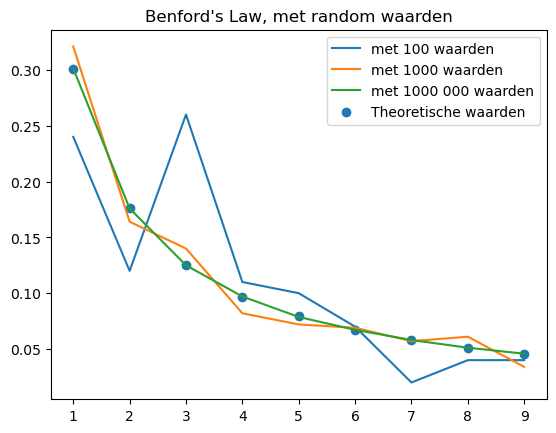

In [46]:
pyplot.title("Benford's Law, met random waarden")

n100_test = benford_rand_test(100)
n100_freq =  n100_test[1]/100
pyplot.plot( n100_test[0] , n100_freq , label='met 100 waarden')

n10e3_test = benford_rand_test(10**3)
n10e3_freq = n10e3_test[1]/10**3
pyplot.plot( n10e3_test[0] , n10e3_freq , label='met 1000 waarden')

n10e6_test = benford_rand_test(10**6)
n10e6_freq = n10e6_test[1]/10**6
pyplot.plot( n10e6_test[0] , n10e6_freq , label='met 1000 000 waarden')

pyplot.scatter(  theorie_benford.index, theorie_benford.freq_theorie , label='Theoretische waarden')
pyplot.legend()

pyplot.show()

## Gemeenten

**Bron:**
- Provincies in cijfers, officiële statistiek van het aantal inwoners | Vlaamse Provincies, gemeenschappelijke cel Data & Analyse (2022) | https://provincies.incijfers.be/databank?workspace_guid=cf0e7f58-6717-4420-a609-cd368f86c7c2 

In [18]:
inwoners = pd.read_csv('data\\Inwoners-2022-gemeenten.csv', sep=';')
inwoners

,gemeente,aantal_inwoners
0,Aalst,88854
1,Aalter,29340
2,Aarschot,30594
3,Aartselaar,14610
4,Affligem,13466
...,...,...
314,Zulte,15943
315,Zutendaal,7307
316,Zwalm,8244
317,Zwevegem,25140


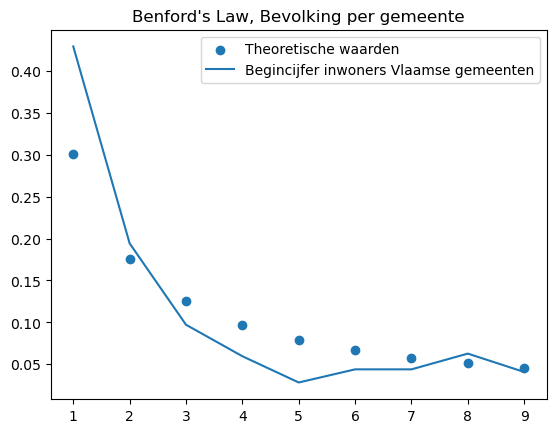

In [50]:
inwoners['begincijfer bevolking'] = inwoners['aantal_inwoners'].apply(first_digit)

inw_bedford = inwoners.groupby('begincijfer bevolking')['begincijfer bevolking'].count() / len(inwoners) 

pyplot.title("Benford's Law, Bevolking per gemeente")
pyplot.scatter(  theorie_benford.index, theorie_benford.freq_theorie , label='Theoretische waarden')
pyplot.plot(inw_bedford, label='Begincijfer inwoners Vlaamse gemeenten')
pyplot.legend()

pyplot.show()

## Fiscale inkomen van Belgie per sector

**Bron**
- Website Statbel, Fiscale inkomens per sector 2020 | Federale Overheid België, Algemene Directie Statistiek (2020) | <https://statbel.fgov.be/nl/themas/huishoudens/fiscale-inkomens>

In [42]:
fisc2020 = pd.read_csv('data\\fisc2020_D_NL.csv', sep=';', na_values='.', thousands=' ')
fisc2020.head(4)

,NIS code van de gemeente,Code van de sector,Naam van de sector,Aantal aangiften,Totaal netto belastbaar inkomen,Gemiddeld inkomen per aangifte,Mediaan inkomen per aangifte,Interkwartiel verschil,Interkwartiele coëfficiënt,Interkwartiele assymmetrie
0,11001,11001A00-,AARTSELAAR-CENTRUM,1414,57758306.0,40847.0,30905.0,30797.0,100.0,30.0
1,11001,11001A01-,DE LEEUWERIK,1531,70106030.0,45791.0,33653.0,37452.0,111.0,29.0
2,11001,11001A020,BUERSTEDE,371,19041789.0,51326.0,39748.0,41665.0,105.0,21.0
3,11001,11001A030,YSSELAAR,233,9387774.0,40291.0,32451.0,31828.0,98.0,24.0


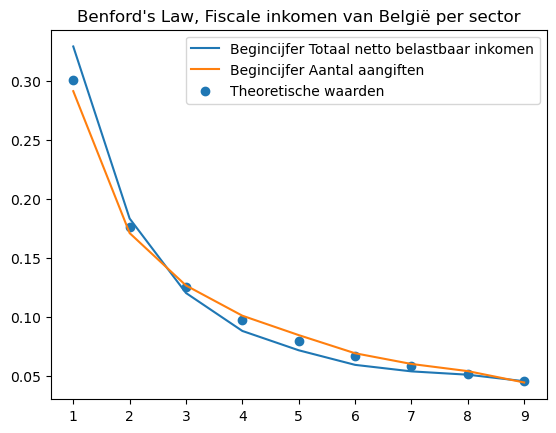

In [49]:
fisc2020['begincijfer Totaal inkomen'] = fisc2020['Totaal netto belastbaar inkomen'].apply(first_digit)
fisc2020['begincijfer Aantal aangiften'] = fisc2020['Aantal aangiften'].apply(first_digit)

#counts when not nan!
len_tot = fisc2020.count()['Totaal netto belastbaar inkomen']
len_nr = fisc2020.count()['Aantal aangiften']

fisc2020_tot_bedford = fisc2020.groupby('begincijfer Totaal inkomen')['begincijfer Totaal inkomen'].count() / len_tot 
fisc2020_nr_bedford = fisc2020.groupby('begincijfer Aantal aangiften')['begincijfer Aantal aangiften'].count() / len_nr 

pyplot.title("Benford's Law, Fiscale inkomen van België per sector")
pyplot.plot(fisc2020_tot_bedford, label='Begincijfer Totaal netto belastbaar inkomen')
pyplot.plot(fisc2020_nr_bedford, label='Begincijfer Aantal aangiften')
pyplot.scatter(  theorie_benford.index, theorie_benford.freq_theorie , label='Theoretische waarden')
pyplot.legend()

pyplot.show()